In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [57]:
#df.to_csv("dados_voo.csv",index=False)

df = pd.read_csv("https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv", index_col=0)
df["data"] = pd.to_datetime(df[['year', 'month', 'day']]) 
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,data
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 1 to 336776
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   year       336776 non-null  int64         
 1   month      336776 non-null  int64         
 2   day        336776 non-null  int64         
 3   dep_time   328521 non-null  float64       
 4   dep_delay  328521 non-null  float64       
 5   arr_time   328063 non-null  float64       
 6   arr_delay  327346 non-null  float64       
 7   carrier    336776 non-null  object        
 8   tailnum    334264 non-null  object        
 9   flight     336776 non-null  int64         
 10  origin     336776 non-null  object        
 11  dest       336776 non-null  object        
 12  air_time   327346 non-null  float64       
 13  distance   336776 non-null  int64         
 14  hour       328521 non-null  float64       
 15  minute     328521 non-null  float64       
 16  data       336776 non-nul

In [59]:
df.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute,data
count,336776.0,336776.000000,336776.000000,328521.000000,328521.000000,328063.000000,327346.000000,336776.000000,327346.000000,336776.000000,328521.000000,328521.000000,336776
mean,2013.0,6.548510,15.710787,1349.109947,12.639070,1502.054999,6.895377,1971.923620,150.686460,1039.912604,13.173544,31.755501,2013-07-02 15:51:47.594365696
min,2013.0,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,0.000000,0.000000,2013-01-01 00:00:00
25%,2013.0,4.000000,8.000000,907.000000,-5.000000,1104.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,16.000000,2013-04-04 00:00:00
50%,2013.0,7.000000,16.000000,1401.000000,-2.000000,1535.000000,-5.000000,1496.000000,129.000000,872.000000,14.000000,31.000000,2013-07-03 00:00:00
75%,2013.0,10.000000,23.000000,1744.000000,11.000000,1940.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,49.000000,2013-10-01 00:00:00
max,2013.0,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,8500.000000,695.000000,4983.000000,24.000000,59.000000,2013-12-31 00:00:00
std,0.0,3.414457,8.768607,488.281791,40.210061,533.264132,44.633292,1632.471938,93.688305,733.233033,4.894426,18.230997,NaN


In [61]:
df.isna().sum()

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
hour         8255
minute       8255
data            0
dtype: int64

In [62]:
# Cria a coluna voo status: OK, DELAY, CANCEL
df["status"] = "OK"
df.loc[(df["dep_delay"] > 0) | (df["arr_delay"] > 0), "status"] = "DELAY"
df.loc[df["dep_time"].isna(), "status"] = "CANCEL"


In [32]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,data,status
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01,DELAY
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01,DELAY
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01,DELAY
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01,OK
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01,OK


### 1. Será que tem uma companhia que atrasa mais ou menos? Será que tem relação com mês?

*MAPA DE CALOR: Compara valores de um indicador numérico entre grupos baseados em outros 2 indicadores, por meio de uma matriz de cores.*

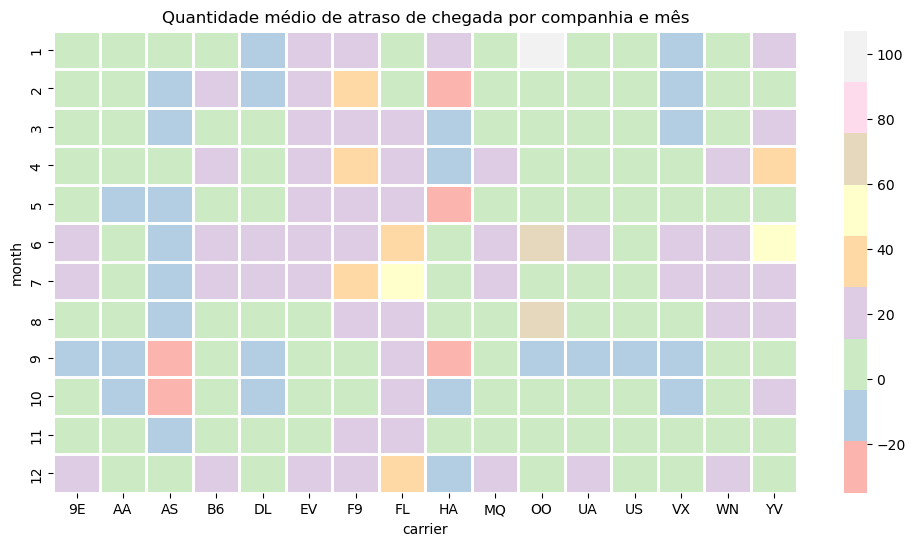

In [63]:
tmp = df.pivot_table(index='month', columns='carrier', values="arr_delay", aggfunc="mean")
tmp.fillna(0, inplace=True) 
plt.figure(figsize=(12, 6))
sns.heatmap(tmp, linecolor='white', linewidth=1, cmap="Pastel1")
plt.title('Quantidade médio de atraso de chegada por companhia e mês');

##### **Meses com mais atrasos**

Visualmente, parece que: 
- Setembro (9) e julho (7) têm células mais escuras (cores mais quentes) em várias companhias, indicam maior atraso médio.
- Dezembro (12) e janeiro (1) também mostram alguns atrasos, mas não tão consistentes.

Companhias com mais atrasos, lgumas colunas se destacam mais frequentemente com cores quentes:
- HA, FL, e F9 parecem ter mais atrasos ao longo do ano.
- Outras companhias (ex.: AA, DL, UA) têm cores mais claras, indicando atrasos médios menores.

Padrão geral:
- Existe variação mensal de atrasos.
- Algumas companhias são consistentemente mais problemáticas, principalmente nos meses de maior movimento (férias ou clima ruim).
- Companhias como AA, DL e UA têm atrasos mais baixos e consistentes, o que pode indicar melhor gerenciamento de voos ou menor volume de   passageiros em meses críticos.

In [34]:
# Tabela resumo

# Total de voos PROGRAMADOS (inclui OK, DELAY e CANCEL). Usado para o % de cancelamento.
total_voos = df.groupby("carrier").size().rename("qtd_programados")

# Total de voos OPERADOS (apenas OK e DELAY). Usado para o % de atraso.
total_voos_operados = df.loc[df["status"] != "CANCEL"].groupby("carrier").size().rename("qtd_operados")

# Total de atrasos (com a nova regra de Partida OU Chegada)
total_delays = df[df["status"] == "DELAY"].groupby("carrier").size().rename("qtd_delays")

# Total de cancelamentos
total_cancelados = df[df["status"] == "CANCEL"].groupby("carrier").size().rename("qtd_cancelados")

# Atraso médio na saída e na chegada (calculado sobre os OPERADOS)
medias = df.loc[df["status"] != "CANCEL"].groupby("carrier")[["dep_delay", "arr_delay"]].mean().rename(
    columns={"dep_delay": "media_dep_delay", "arr_delay": "media_arr_delay"}
)

# Junta tudo
tabela = pd.concat([total_voos, total_voos_operados, total_delays, total_cancelados, medias], axis=1)

# GARANTIA DE DADOS LIMPOS: Preenche NaN com 0
tabela = tabela.fillna(0)

# 1. Taxa de Risco de Atraso (DENOMINADOR: OPERADOS)
tabela["pct_delay"] = tabela["qtd_delays"] / tabela["qtd_operados"] * 100

# 2. Taxa de Risco de Cancelamento (DENOMINADOR: PROGRAMADOS)
tabela["pct_cancelamento"] = tabela["qtd_cancelados"] / tabela["qtd_programados"] * 100

# Organiza as colunas e reseta o índice
tabela = tabela.reset_index()

tabela

,carrier,qtd_programados,qtd_operados,qtd_delays,qtd_cancelados,media_dep_delay,media_arr_delay,pct_delay,pct_cancelamento
0,9E,18460,17416,8645,1044.0,16.725769,7.379669,49.638264,5.655471
1,AA,32729,32093,14200,636.0,8.586016,0.364291,44.246409,1.943231
2,AS,714,712,290,2.0,5.804775,-9.930889,40.730337,0.280112
3,B6,54635,54169,28618,466.0,13.022522,9.457973,52.830955,0.852933
4,DL,48110,47761,21528,349.0,9.264505,1.644341,45.074433,0.725421
5,EV,54173,51356,28440,2817.0,19.955390,15.796431,55.378145,5.200007
6,F9,685,682,477,3.0,20.215543,21.920705,69.941349,0.437956
7,FL,3260,3187,2163,73.0,18.726075,20.115906,67.869470,2.239264
8,HA,342,342,129,0.0,4.900585,-6.915205,37.719298,0.000000
9,MQ,26397,25163,12780,1234.0,10.552041,10.774733,50.788857,4.674774


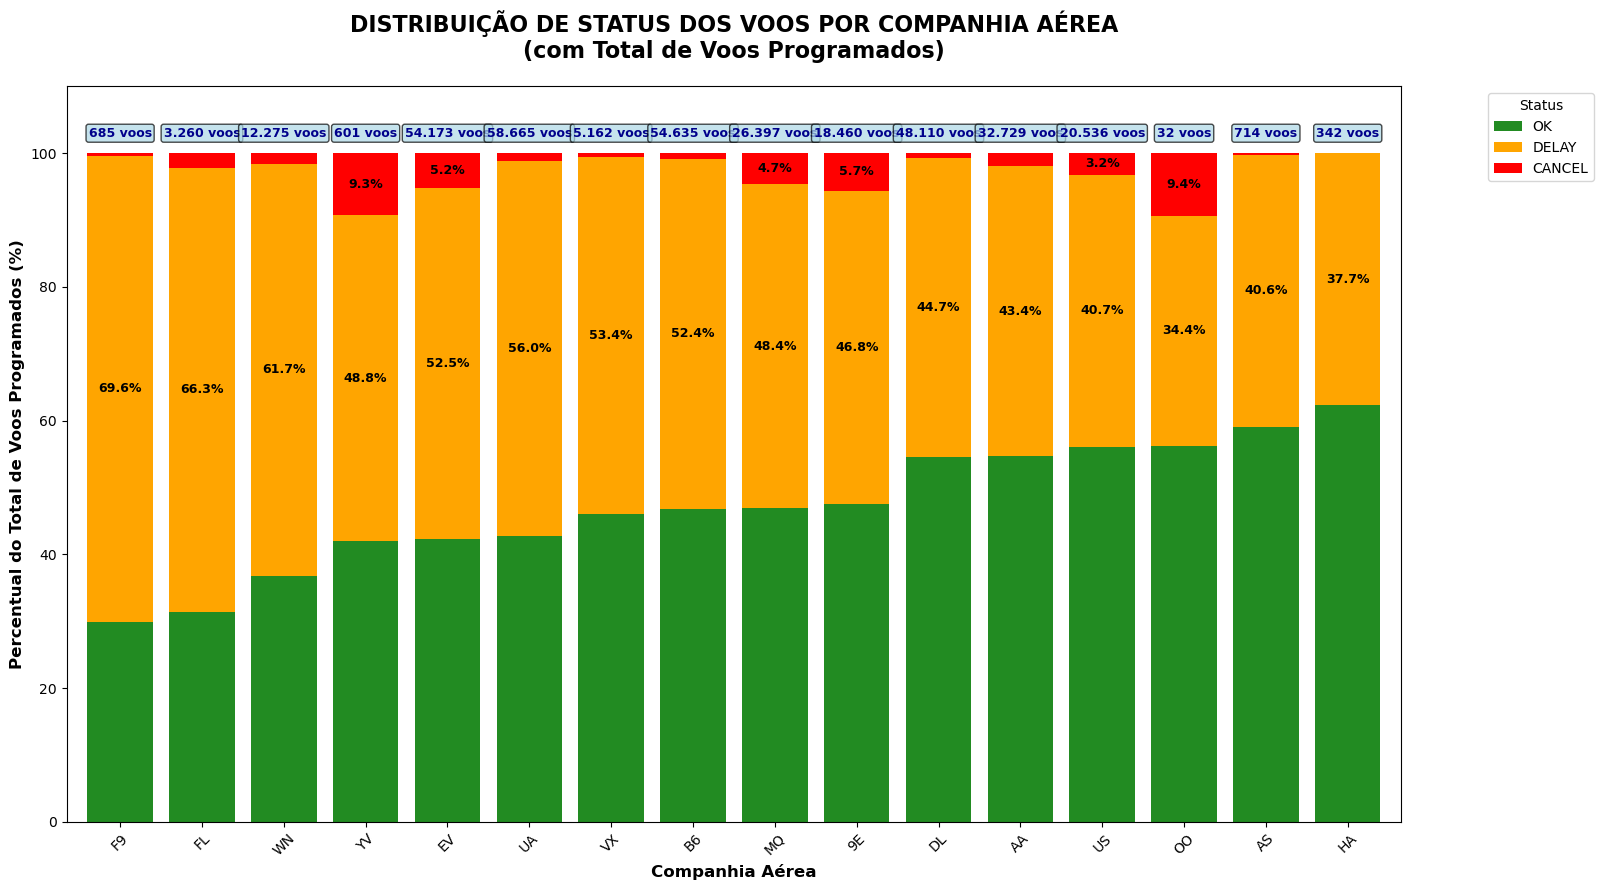

In [64]:
# Cria a tabela de percentuais de status para o gráfico
status_counts = df.groupby('carrier')['status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Tabela dinâmica para empilhamento
status_pivot = status_counts.pivot_table(index='carrier', columns='status', values='percent', fill_value=0)

# Ordenar as colunas para que OK fique na base e CANCEL/DELAY fiquem no topo
status_pivot = status_pivot[['OK', 'DELAY', 'CANCEL']]

# Ordenar as companhias pela soma de atraso e cancelamento (do PIOR para o MELHOR)
status_pivot['Total_Problem'] = status_pivot['DELAY'] + status_pivot['CANCEL']
status_pivot = status_pivot.sort_values(by='Total_Problem', ascending=False).drop(columns=['Total_Problem'])

# PEGA OS TOTAIS DE VOOS PROGRAMADOS
total_voos_por_carrier = df.groupby('carrier').size()

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(16, 9))

# Cores: OK (Verde Escuro), DELAY (Laranja/Amarelo), CANCEL (Vermelho)
colors = {'OK': 'forestgreen', 'DELAY': 'orange', 'CANCEL': 'red'}

# Cria o gráfico de barras empilhadas 100%
status_pivot.plot(kind='bar', stacked=True, color=[colors[col] for col in status_pivot.columns], ax=ax, width=0.8)

# Adiciona título e rótulos
plt.title('DISTRIBUIÇÃO DE STATUS DOS VOOS POR COMPANHIA AÉREA\n(com Total de Voos Programados)', 
          fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Companhia Aérea', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentual do Total de Voos Programados (%)', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Status', loc='upper right', bbox_to_anchor=(1.15, 1))

# ADICIONA O TOTAL DE VOOS ACIMA DE CADA BARRA
for i, carrier in enumerate(status_pivot.index):
    total_voos = total_voos_por_carrier[carrier]
    # Formatação: milhares separados por ponto
    total_formatado = f'{total_voos:,}'.replace(',', '.')
    ax.text(i, 102, f'{total_formatado} voos', 
            ha='center', va='bottom', 
            fontsize=9, fontweight='bold', 
            color='darkblue',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))

# Adiciona porcentagens dentro das barras (para DELAY e CANCEL)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        
        # Apenas mostra o rótulo se a fatia for grande o suficiente (> 3%)
        if height > 3:
            # Calcula o rótulo apenas para DELAY e CANCEL (as categorias de problema)
            status = container.get_label()
            if status in ['DELAY', 'CANCEL']:
                ax.text(x + width / 2, y + height / 2, 
                        f'{height:.1f}%', 
                        ha='center', va='center', 
                        color='black', fontsize=9, fontweight='bold')

plt.ylim(0, 110)  # Aumenta para caber o total de voos acima
fig.tight_layout()
plt.show()

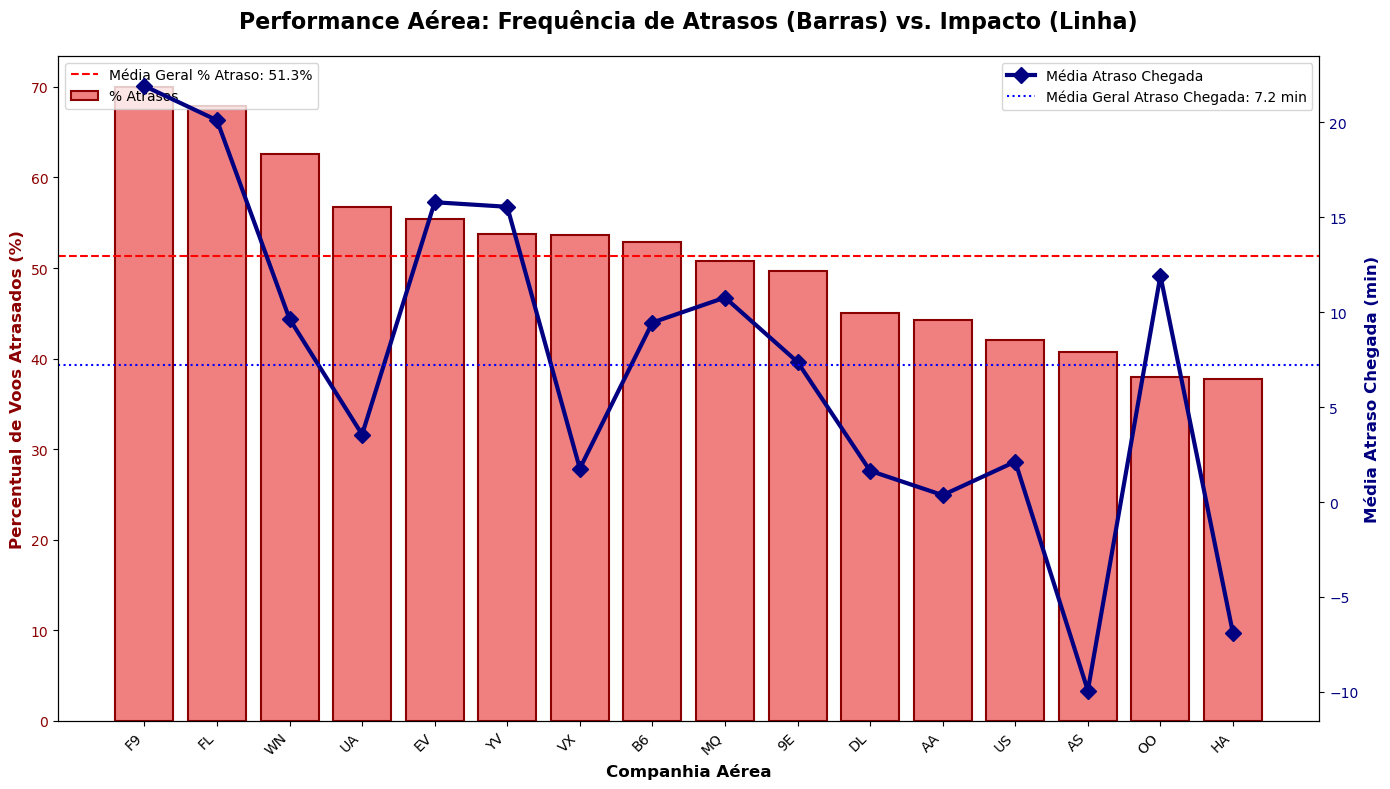

In [65]:
# ----------------------------------------------------------------------
# NOVO GRÁFICO PARA O POWERPOINT: FREQUÊNCIA (Barras) vs SEVERIDADE (Linha)
# ----------------------------------------------------------------------

fig, ax1 = plt.subplots(figsize=(14, 8))

# 1. Ordenar por percentual de atrasos (Frequência/Risco)
tabela_sorted = tabela.sort_values('pct_delay', ascending=False)

# Eixo 1 (Esquerda) - Barras: Percentual de Atrasos (Frequência)
bars = ax1.bar(tabela_sorted['carrier'], tabela_sorted['pct_delay'], 
                color='lightcoral', edgecolor='darkred', linewidth=1.5, label='% Atrasos')
ax1.set_xlabel('Companhia Aérea', fontsize=12, fontweight='bold')
ax1.set_ylabel('Percentual de Voos Atrasados (%)', color='darkred', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='darkred')
ax1.set_xticklabels(tabela_sorted['carrier'], rotation=45, ha='right')
ax1.set_ylim(bottom=0)

# Eixo 2 (Direita) - Linha: Média de Atraso na Chegada (Severidade/Impacto)
ax2 = ax1.twinx()
line = ax2.plot(tabela_sorted['carrier'], tabela_sorted['media_arr_delay'], 
                color='navy', marker='D', linestyle='-', linewidth=3, markersize=8, label='Média Atraso Chegada')
ax2.set_ylabel('Média Atraso Chegada (min)', color='navy', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='navy')

# Linhas de referência para o Eixo 1 (Frequência)
mean_delay_pct = tabela_sorted['pct_delay'].mean()
ax1.axhline(y=mean_delay_pct, color='red', linestyle='--', linewidth=1.5, 
            label=f'Média Geral % Atraso: {mean_delay_pct:.1f}%')

# Linhas de referência para o Eixo 2 (Severidade)
mean_delay_arr = tabela_sorted['media_arr_delay'].mean()
ax2.axhline(y=mean_delay_arr, color='blue', linestyle=':', linewidth=1.5, 
            label=f'Média Geral Atraso Chegada: {mean_delay_arr:.1f} min')

# Título e Legendas
plt.title('Performance Aérea: Frequência de Atrasos (Barras) vs. Impacto (Linha)', 
          fontsize=16, fontweight='bold', pad=20)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

### 2. Quais são as origens mais frequentes?  E os destinos?

In [37]:
df.groupby("origin").count()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,dest,air_time,distance,hour,minute,data,status
origin,,,,,,,,,,,,,,,,,
EWR,120835,120835,120835,117596,117596,117445,117127,120835,120229,120835,120835,117127,120835,117596,117596,120835,120835
JFK,111279,111279,111279,109416,109416,109284,109079,111279,110370,111279,111279,109079,111279,109416,109416,111279,111279
LGA,104662,104662,104662,101509,101509,101334,101140,104662,103665,104662,104662,101140,104662,101509,101509,104662,104662


Gráfico de roscas : Versão alternativa do gráfico de setores, um pouco mais pautada na noção de comprimento (de arcos)


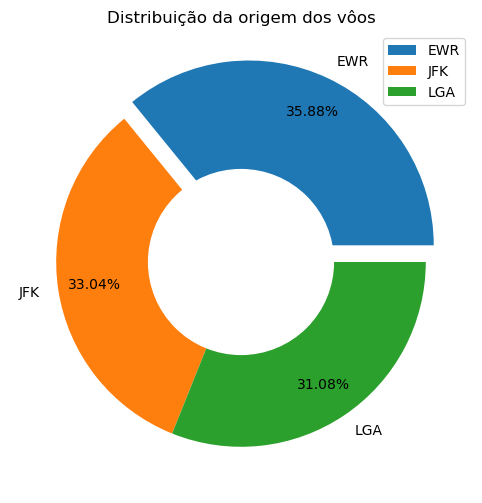

In [38]:
# A partir de um dataframe
tmp = pd.DataFrame(df.groupby("origin").count())
tmp.plot.pie(y='day',
             autopct='%1.2f%%',
             ylabel='',
             explode = (0.1, 0, 0),
             pctdistance=0.8, # controla a posição do texto
             fontsize=10,
             figsize=(8,6),
             title='Distribuição da origem dos vôos');
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle);

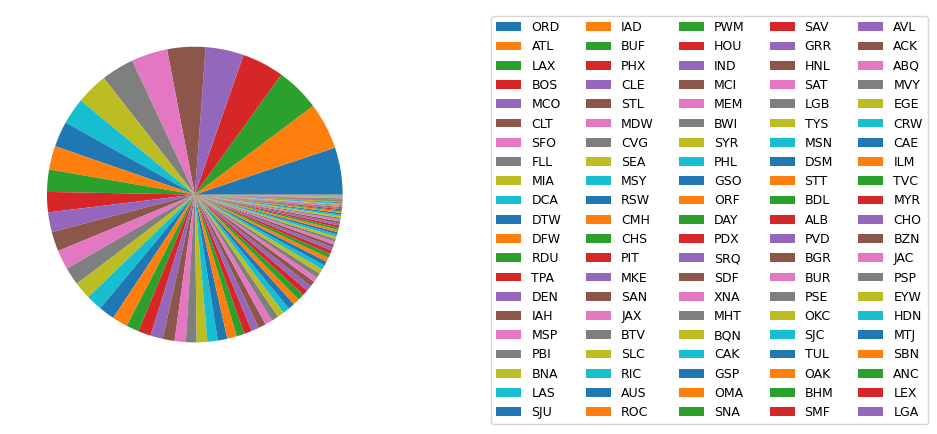

In [39]:
# Melhorando as legendas
plt.pie(dict(df['dest'].value_counts()).values())
plt.legend(labels = dict(df['dest'].value_counts()).keys(),
           loc='upper right', ncol = 5, bbox_to_anchor=[2.5, 1], fontsize=9);

In [66]:
# ============================================================
# 1) TABELA BASE (seleção de colunas + limpeza)
# ============================================================
tabela_base = df[['carrier', 'origin', 'dest', 'tailnum',
                  'distance', 'air_time', 'arr_delay', 'dep_delay']].copy()

# Mantém apenas voos operados: remove linhas sem dep_delay/arr_delay
tabela_base = tabela_base.dropna(subset=['arr_delay', 'dep_delay']).copy()

# Criar coluna de rota
tabela_base['rota'] = tabela_base['origin'] + ' → ' + tabela_base['dest']


# ============================================================
# 2) TABELA DE ROTAS
# ============================================================
tabela_rotas = (
    tabela_base
    .groupby(['carrier', 'origin', 'dest', 'rota'])
    .agg(
        qtd_voos = ('rota', 'count'),
        distancia_media = ('distance', 'mean'),
        tempo_medio_voo = ('air_time', 'mean'),
        atraso_medio_chegada = ('arr_delay', 'mean'),
        atraso_medio_partida = ('dep_delay', 'mean'),
        # taxa_atraso calculada sobre arr_delay: proporção de arr_delay > 0
        taxa_atraso = ('arr_delay', lambda x: ( (x > 0).sum() / x.count() * 100 ) if x.count() > 0 else 0.0)
    )
    .reset_index()
)


# ============================================================
# 3) TABELA DE AERONAVES
# ============================================================
tabela_aeronaves = (
    tabela_base
    .groupby(['tailnum'])
    .agg(
        qtd_voos = ('tailnum', 'count'),
        companhias_operando = ('carrier', 'nunique'),
        atraso_medio_chegada = ('arr_delay', 'mean'),
        atraso_medio_partida = ('dep_delay', 'mean'),
        taxa_atraso = ('arr_delay', lambda x: ( (x > 0).sum() / x.count() * 100 ) if x.count() > 0 else 0.0)
    )
    .reset_index()
)


# ============================================================
# 4) RESUMO DAS TABELAS
# ============================================================
print("Tamanho da tabela base:", tabela_base.shape)
print("Tamanho da tabela de rotas:", tabela_rotas.shape)
print("Tamanho da tabela de aeronaves:", tabela_aeronaves.shape)

# Mostrar as primeiras linhas para conferir
tabela_base.head(), tabela_rotas.head(), tabela_aeronaves.head()


Tamanho da tabela base: (327346, 9)
Tamanho da tabela de rotas: (437, 10)
Tamanho da tabela de aeronaves: (4037, 6)


(  carrier origin dest tailnum  distance  air_time  arr_delay  dep_delay  \
 1      UA    EWR  IAH  N14228      1400     227.0       11.0        2.0   
 2      UA    LGA  IAH  N24211      1416     227.0       20.0        4.0   
 3      AA    JFK  MIA  N619AA      1089     160.0       33.0        2.0   
 4      B6    JFK  BQN  N804JB      1576     183.0      -18.0       -1.0   
 5      DL    LGA  ATL  N668DN       762     116.0      -25.0       -6.0   
 
         rota  
 1  EWR → IAH  
 2  LGA → IAH  
 3  JFK → MIA  
 4  JFK → BQN  
 5  LGA → ATL  ,
   carrier origin dest       rota  qtd_voos  distancia_media  tempo_medio_voo  \
 0      9E    EWR  ATL  EWR → ATL         4            746.0       111.000000   
 1      9E    EWR  CVG  EWR → CVG       796            569.0        95.337940   
 2      9E    EWR  DTW  EWR → DTW       220            488.0        85.600000   
 3      9E    EWR  MSP  EWR → MSP       173           1008.0       156.803468   
 4      9E    JFK  ATL  JFK → ATL       

In [67]:
tabela_base['rota'].nunique()

223

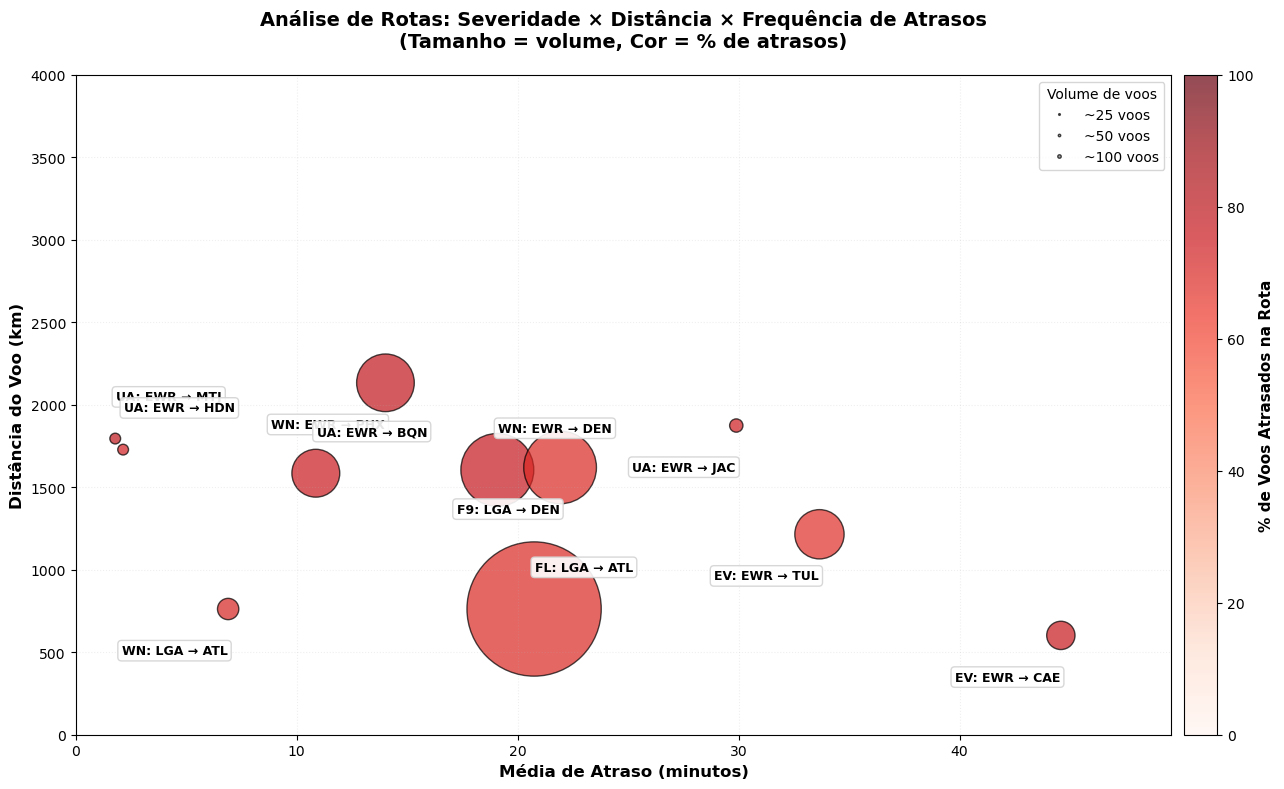


ANÁLISE POR SEVERIDADE DE ATRASO
Pos  Rota                      Atraso(m)    Dist(km)   %Atraso    Voos    
--------------------------------------------------------------------------------
1    EV: EWR → CAE                   44.6 min       602      76.9% 🔴 ALTA         104
2    EV: EWR → TUL                   33.7 min      1215      67.6% 🔴 ALTA         315
3    UA: EWR → JAC                   29.9 min      1874      73.9% 🔴 ALTA          23
4    F9: LGA → DEN                   21.9 min      1620      69.6% 🔴 ALTA         685
5    FL: LGA → ATL                   20.7 min       762      69.7% 🔴 ALTA        2337
6    WN: EWR → DEN                   19.1 min      1605      77.2% 🔴 ALTA         689
7    WN: EWR → PHX                   14.0 min      2133      78.2% 🔴 ALTA         431
8    UA: EWR → BQN                   10.9 min      1585      75.4% 🔴 ALTA         297
9    WN: LGA → ATL                    6.9 min       762      71.2% 🔴 ALTA          59
10   UA: EWR → HNL                  

In [69]:
# 1. CRIAR ROTA COM COMPANHIA NO NOME 
# df['rota_companhia'] = df['carrier'] + ': ' + df['origin'] + ' → ' + df['dest']

# 2. CALCULAR ESTATÍSTICAS

# 3. GRÁFICO COM NOVA CONFIGURAÇÃO
fig, ax = plt.subplots(figsize=(14, 8))

# TAMANHO DAS BOLHAS (volume de voos)
tamanho_base = 4  # Ajustável
sizes = top_rotas['total_voos'] * tamanho_base

# COR DAS BOLHAS (% de atrasos) - AGORA É A COR!
scatter = ax.scatter(
    top_rotas['media_atraso_min'],  # X: minutos de atraso
    top_rotas['distance'],          # Y: distância (km)
    s=sizes,                        # Tamanho: volume
    c=top_rotas['pct_atraso'],      # COR: % de atrasos ← NOVO!
    cmap='Reds',                    # Vermelho = alta frequência
    alpha=0.7,
    edgecolors='black',
    linewidth=1,
    vmin=0,
    vmax=100  # % vai de 0 a 100
)

# ESCALA DOS EIXOS
margem_x = 5
margem_y = 100
ax.set_xlim(0, top_rotas['media_atraso_min'].max() + margem_x)
ax.set_ylim(0, min(4000, top_rotas['distance'].max() + margem_y))

# LABELS DAS ROTAS
for i, (rota, atraso_min, distancia) in enumerate(zip(top_rotas.index, 
                                                      top_rotas['media_atraso_min'], 
                                                      top_rotas['distance'])):
    # Posição alternada
    offset_x = 0.5 if i % 2 == 0 else -0.5
    offset_y = 30 if i % 2 == 0 else -30
    ha_pos = 'left' if i % 2 == 0 else 'right'
    
    ax.annotate(
        rota,
        xy=(atraso_min, distancia),
        xytext=(offset_x, offset_y),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold',
        ha=ha_pos,
        va='center',
        bbox=dict(boxstyle="round,pad=0.3", 
                 facecolor='white', 
                 alpha=0.9,
                 edgecolor='lightgray')
    )

# BARRA DE CORES (% de atrasos) - AGORA MOSTRA %
cbar = plt.colorbar(scatter, ax=ax, pad=0.01)
cbar.set_label('% de Voos Atrasados na Rota', fontweight='bold', fontsize=11)

# LEGENDA PARA TAMANHO (volume de voos)
import matplotlib.lines as mlines
volumes_exemplo = [25, 50, 100]
tamanhos_exemplo = [v * tamanho_base for v in volumes_exemplo]

legend_elements = [
    mlines.Line2D([], [], marker='o', color='gray', markersize=np.sqrt(s)/8,
                 label=f'~{v} voos', linestyle='None', 
                 markeredgecolor='black', alpha=0.7)
    for s, v in zip(tamanhos_exemplo, volumes_exemplo)
]

ax.legend(handles=legend_elements, title='Volume de voos', 
          loc='upper right', framealpha=0.8)

# CONFIGURAÇÕES
ax.set_xlabel('Média de Atraso (minutos)', fontsize=12, fontweight='bold')
ax.set_ylabel('Distância do Voo (km)', fontsize=12, fontweight='bold')
ax.set_title('Análise de Rotas: Severidade × Distância × Frequência de Atrasos\n(Tamanho = volume, Cor = % de atrasos)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.2, linestyle=':')

plt.tight_layout()
plt.show()

# 4. TABELA RESUMO (nova ordem)
print("\n" + "="*80)
print("ANÁLISE POR SEVERIDADE DE ATRASO")
print("="*80)
print(f"{'Pos':<4} {'Rota':<25} {'Atraso(m)':<12} {'Dist(km)':<10} {'%Atraso':<10} {'Voos':<8}")
print("-"*80)

# Ordenar por minutos de atraso (severidade)
top_rotas_sorted = top_rotas.sort_values('media_atraso_min', ascending=False)

for i, (rota, dados) in enumerate(top_rotas_sorted.iterrows(), 1):
    # Classificação
    if dados['pct_atraso'] > 60:
        freq = "🔴 ALTA"
    elif dados['pct_atraso'] > 40:
        freq = "🟡 MÉDIA"
    else:
        freq = "🟢 BAIXA"
    
    print(f"{i:<4} {rota:<25} {dados['media_atraso_min']:>10.1f} min "
          f"{int(dados['distance']):>9} {dados['pct_atraso']:>9.1f}% {freq:<10} "
          f"{int(dados['total_voos']):>7}")

### 3. Será que tem uma companhia que atrasa (chegada e partida) mais ou menos? 

Gráfico de bolhas :  Semelhante a um gráfico de dispersão, mas incorpora um terceiro indicador numérico, representado pelas áreas das bolhas

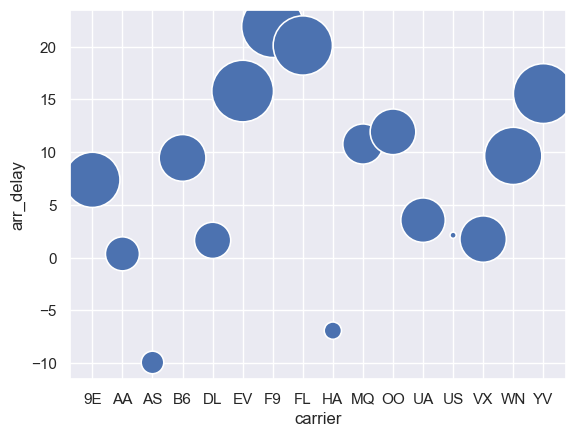

In [14]:
tmp = df.groupby(["carrier"])[["dep_delay", "arr_delay"]].mean().reset_index()
sns.set_theme(style="darkgrid")

sns.scatterplot(
    data=tmp,
    x="carrier",
    y="arr_delay",
    size="dep_delay",
    legend=False,
    sizes=(20, 2000)
);

### 4. Representatividade das companhias

Barra simples, utilizado para :
- Representar frequências absolutas ou relativas (%) associadas às categorias de um indicador.
- Comparar valores de um indicador numérico com quebra de grupos.
- Evolução de um indicador numérico ao longo do tempo.

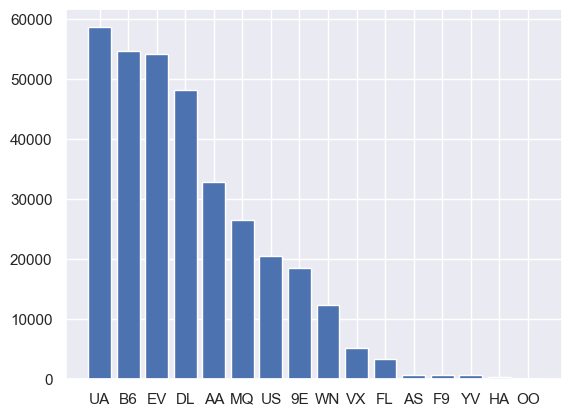

In [15]:
plt.bar(
    list(dict(df['carrier'].value_counts()).keys()),
    list(dict(df['carrier'].value_counts()).values())
    );

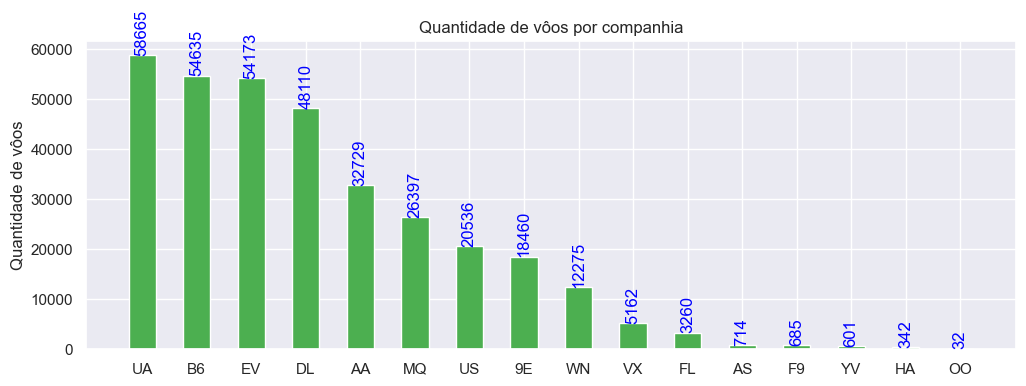

In [16]:
fig, ax = plt.subplots(figsize = (12,4))
ax.bar(
    list(dict(df['carrier'].value_counts()).keys()),
    list(dict(df['carrier'].value_counts()).values()),
    color = "#4CAF50",
    width=.5,
    )
ax.bar_label(ax.containers[0], label_type='edge', color = "blue", rotation = 90)
ax.set_ylabel('Quantidade de vôos')
ax.set_title('Quantidade de vôos por companhia');

### 5. Será que as companhias que voam mais, voam por mais tempo? Será que tem companhia que só voa em uma origem?

Barras empilhadas:
-  Representação de frequências relacionadas a 2+ grupos, ao longo do tempo ou não.
-  Pode-se representar frequências relativas (%), de forma que todas as barras somem 100%


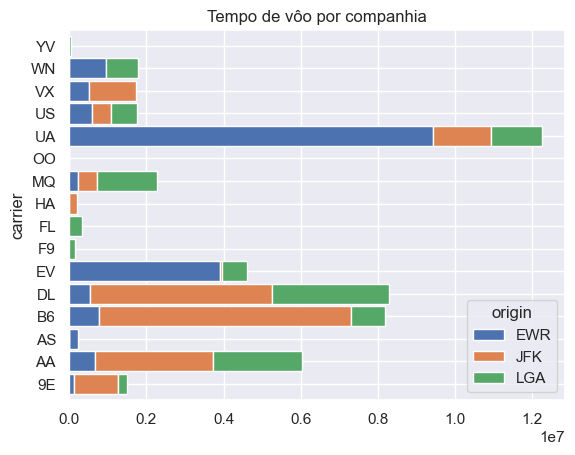

In [17]:
tmp = df.pivot_table(index='carrier', columns='origin', values='air_time', aggfunc="sum").reset_index()
tmp.plot(x='carrier', kind='barh', stacked=True, 
         title='Tempo de vôo por companhia', 
         width=.9,
         );

Barra simples agrupado: podem ser úteis quando há 2 ou mais públicos ou indicadores para comparar

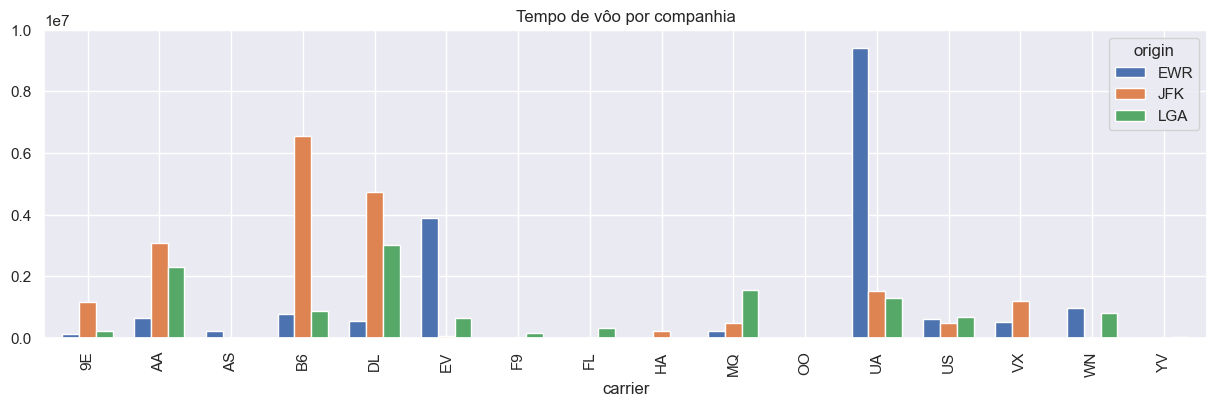

In [18]:
tmp.plot(x='carrier', kind='bar', stacked=False, 
         title='Tempo de vôo por companhia', 
         figsize=(15,4),
         width=.7,
         ylim=(0, 10000000) # ajuste para ficar com o mesmo limite do de cima
         );

### 6. Será que a origem interfere nos atrasos?
Gráfico de linhas
-  Ideal para representar evolução de um indicador numérico ao longo do tempo, devido à noção de direção: aumento/redução.
- Pode ser utilizado para comparar a evolução por grupo, desde que não haja muitas intersecções entre as linhas.
-  Funciona melhor que o gráfico de barras para evoluções, especialmente quando há alta quantidade de pontos.

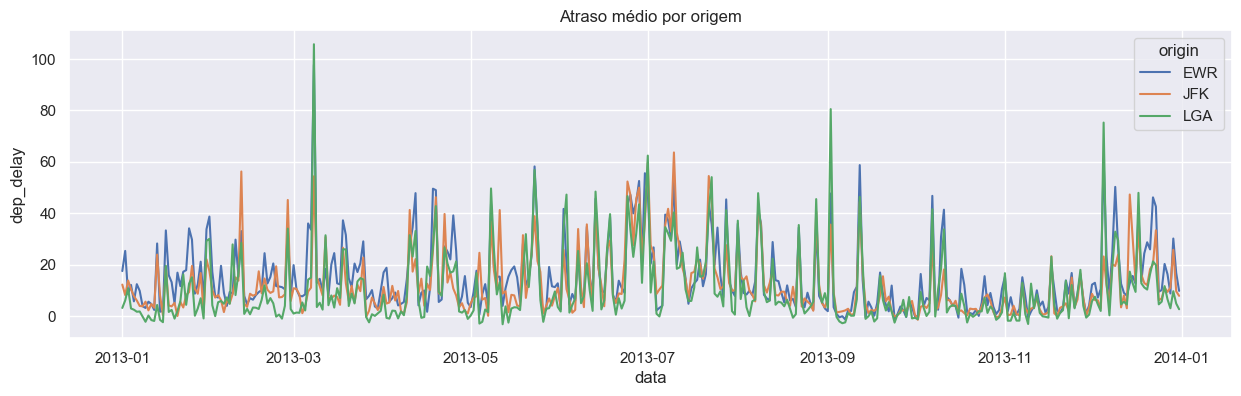

In [19]:
tmp = df.groupby(["data","origin"])["dep_delay"].mean().reset_index()
plt.figure(figsize=(15,4))
plt.title("Atraso médio por origem")
sns.lineplot(data=tmp, x="data",y='dep_delay', hue='origin');

### 7. Quem atrasa para partir atrasa para chegar?

Gráficos de dispersão: Utilizado para avaliar relações entre dois indicadores numéricos

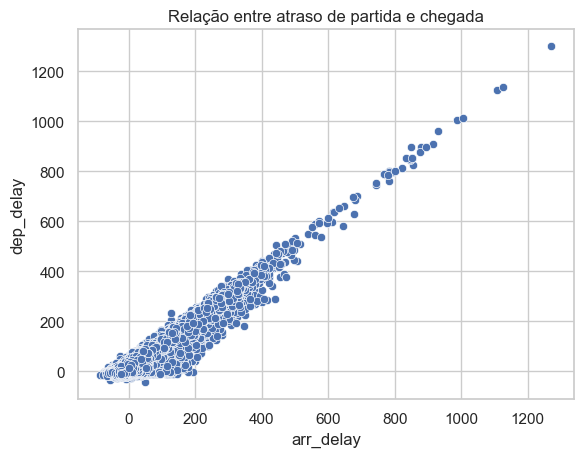

In [20]:
sns.set_style("whitegrid")
ax = sns.scatterplot(data=df, x="arr_delay", y="dep_delay")
ax.set_title("Relação entre atraso de partida e chegada");